In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [54]:
data_path = "/home/roger/Desktop/surprise-adaptive-agents/butterflies/runs"
exps = os.listdir(data_path)
reward_results = {}
surprise_results = {}

key_to_plot = "ep_surprise" # could be "ep_return", "ep_length", "ep_surprise", "ep_entropy"

for exp in exps:
    if "MinAtar" in exp:
        continue
    
    if os.path.isdir(os.path.join(data_path, exp)):
        
        #join all words but the last _seed:1
        exp_name = "_".join(exp.split("_")[:-1])
        
        if exp_name not in reward_results:
            reward_results[exp_name] = []
            surprise_results[exp_name] = []
            
        file = os.path.join(data_path, exp, "log.csv")
        reward_data = pd.read_csv(file)
        reward_results[exp_name].append(reward_data["ep_entropy"])
        surprise_results[exp_name].append(reward_data["ep_entropy"])

        # for tetris, instead, overwrite the return with =1 if ep_length > 500 and =0 otherwise
        if "tetris" in exp and key_to_plot == "ep_return":
            reward_results[exp_name][-1] = (reward_data["ep_length"] > 100).astype(int)


In [55]:
# make sure for each key in results, all the lists of rewards in the key are of the same length (which should be the max length common to all)
min_lens = {}
for key in reward_results:
    min_len = min([len(x) for x in reward_results[key]])
    reward_results[key] = [x[:min_len] for x in reward_results[key]]
    surprise_results[key] = [x[:min_len] for x in surprise_results[key]]
    min_lens[key] = min_len

In [56]:
# select only X points
num_points = 30
for key in reward_results.keys():
    try:
        reward_results[key] = np.array(reward_results[key])
        indices = np.linspace(0, reward_results[key].shape[1]-1, num_points, dtype=int)
        reward_results[key] = reward_results[key][:, indices]
        surprise_results[key] = np.array(surprise_results[key])
        surprise_results[key] = surprise_results[key][:, indices]
    except:
        print(key)
        print(reward_results[key].shape)

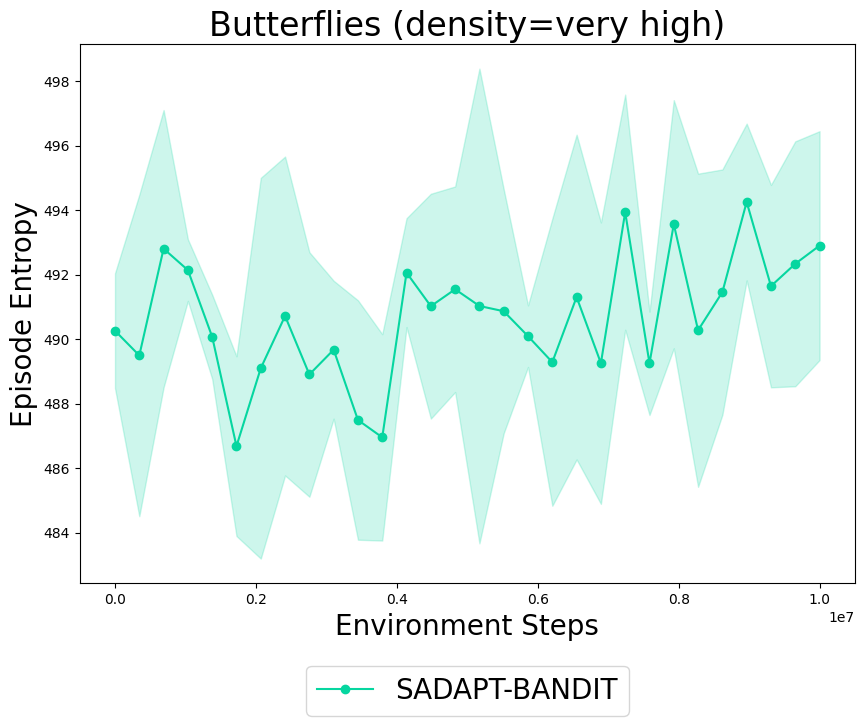

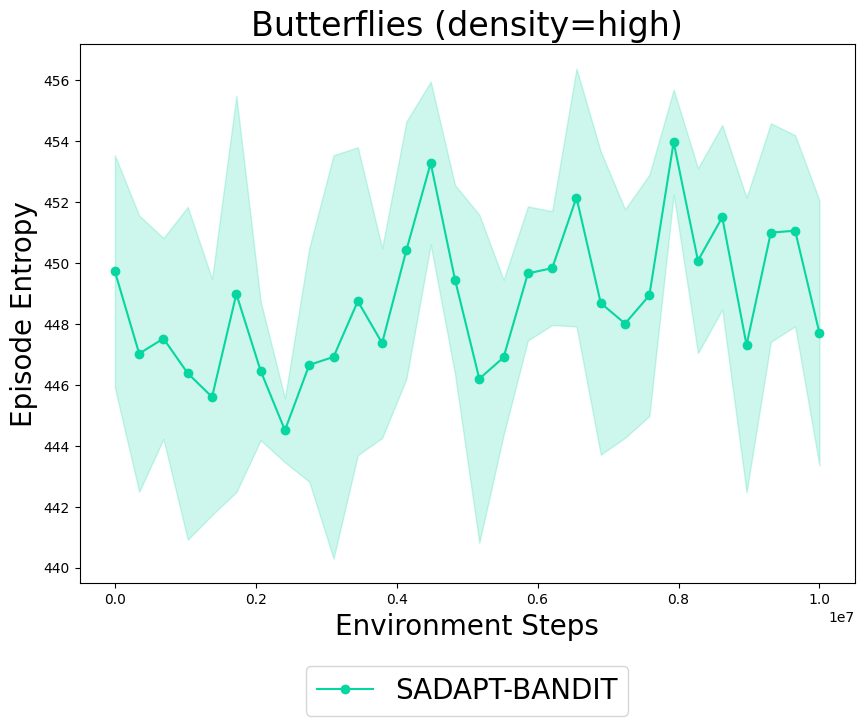

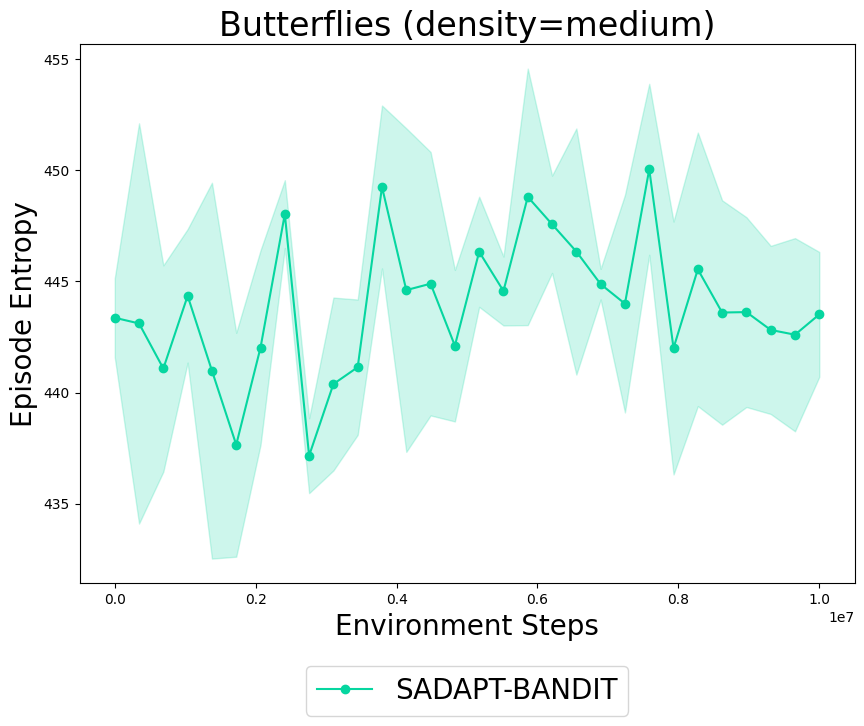

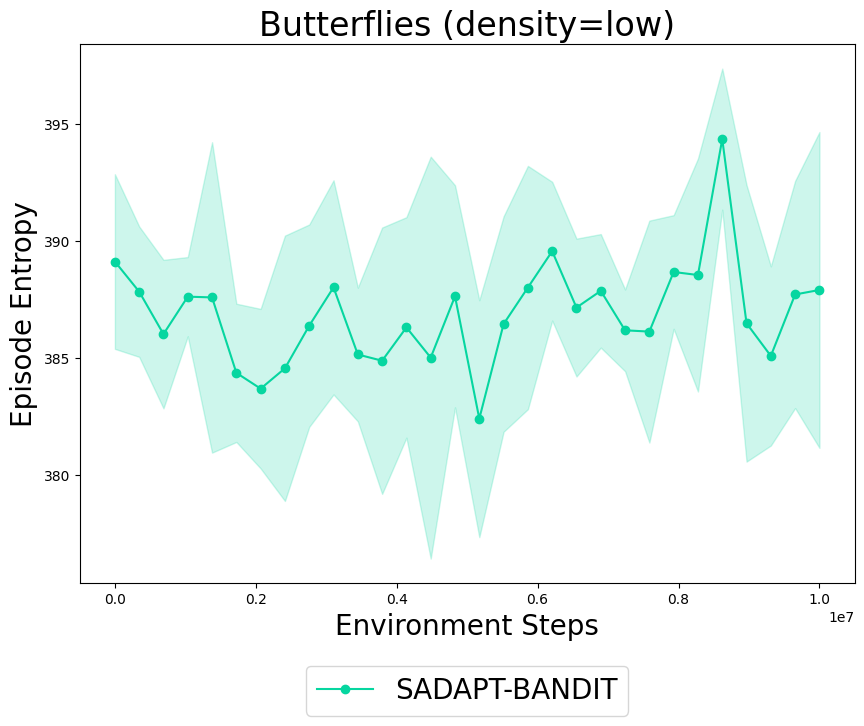

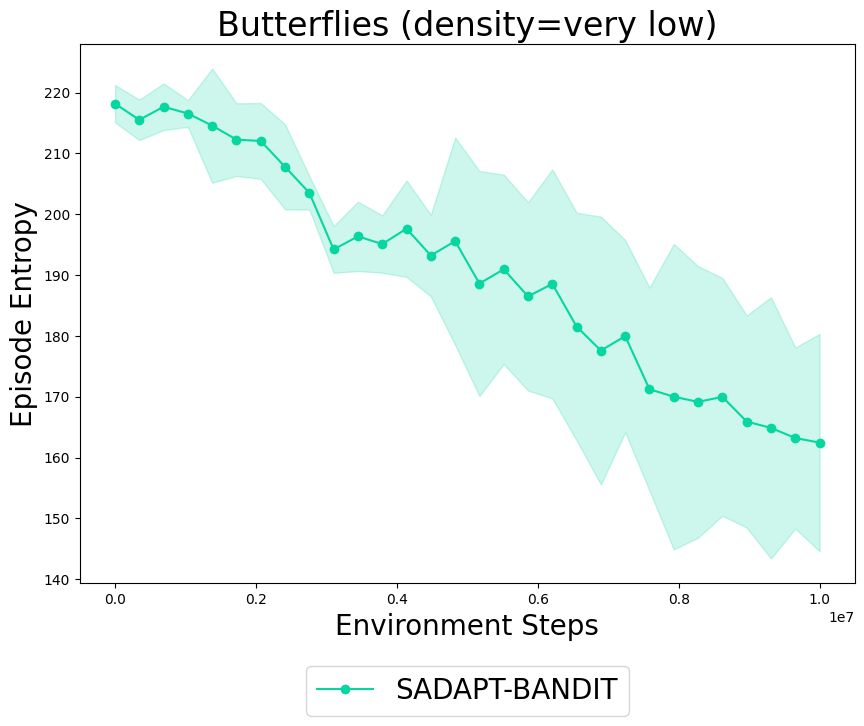

In [57]:
#env_names = ["ButterfliesEnv", "tetris", "ButterfliesEnvLarge", "MazeEnvLarge2", "ButterfliesEnvLarge2", "MazeEnv2", "Breakout", "Freeway", "Seaquest", "SpaceInvaders", "Asterix"]
env_names = ["ButterfliesEnvLarge3", "ButterfliesEnvLarge4", "ButterfliesEnvLarge5", "ButterfliesEnvLarge6", "ButterfliesEnvLarge8"]
# one color for S-Max, S-Min, Extrinisc, S-Adapt
colors = ["#06d6a0", "#118ab2", "#ef476f", "#073b4c", "#ffbc42"]

for env in env_names:
    plt.figure(figsize=(10, 7))
    idx_ = 0
    for exp in sorted(reward_results):
        if env not in exp or \
            (env == "MazeEnv" and ("MazeEnvLarge" in exp or "MazeEnvLarge2" in exp or "MazeEnv2" in exp)) or (env == "ButterfliesEnv" and ("ButterfliesEnvLarge" in exp or "ButterfliesEnvLarge2" in exp)) \
            or \
            (env == "MazeEnvLarge" and ("MazeEnv2" in exp or "MazeEnvLarge2" in exp)) or (env == "ButterfliesEnvLarge" and ("ButterfliesEnv2" in exp or "ButterfliesEnvLarge2" in exp)):
            continue

        if "gaussian" in exp: continue
        
        if env in ["Breakout", "Freeway", "Seaquest", "SpaceInvaders", "Asterix"]:
            exp_name = exp.split("_")[1].upper()
        else:
            exp_name = exp.split("_")[2].upper()
            
        if "random" in exp:
            exp_name = "Random"

        if exp_name == "NONE": exp_name = "EXTRINSIC"
        
        if key_to_plot == "ep_return":
            metric_title = "Episode Return"
        elif key_to_plot == "ep_surprise":
            metric_title = "Episode Surprise"
        elif key_to_plot == "ep_entropy":
            metric_title = "Episode Entropy"
        elif key_to_plot == "ep_length":
            metric_title = "Episode Length"
        else:
            raise ValueError("Invalid key_to_plot")
        
        env_title = env.capitalize()
        
        if env_title == "Butterfliesenv":
            env_title = "Butterflies (small)"
        elif env_title == "Butterfliesenvlarge":
            env_title = "Butterflies (large / dense)"
        elif env_title == "Butterfliesenvlarge2":
            env_title = "Butterflies (large)"
        elif env_title == "Mazeenv2":
            env_title = "Maze (small)"
        elif env_title == "Mazeenvlarge2":
            env_title = "Maze (large)"
        elif env_title == "Tetris":
            env_title = "Tetris"
        elif env_title == "Breakout":
            env_title = "Breakout"
        elif env_title == "Freeway":
            env_title = "Freeway"
        elif env_title == "Seaquest":
            env_title = "Seaquest"
        elif env_title == "Spaceinvaders":
            env_title = "Space Invaders"
        elif env_title == "Asterix":
            env_title = "Asterix"
        elif env_title == "Butterfliesenvlarge3":
            env_title = "Butterflies (density=very high)"
        elif env_title == "Butterfliesenvlarge4":
            env_title = "Butterflies (density=high)"
        elif env_title == "Butterfliesenvlarge5":
            env_title = "Butterflies (density=medium)"
        elif env_title == "Butterfliesenvlarge6":
            env_title = "Butterflies (density=low)"
        elif env_title == "Butterfliesenvlarge8":
            env_title = "Butterflies (density=very low)"
        else:
            print(env_title)
            raise ValueError("Invalid env_title")
        
        if exp_name == "Random":
            # just compute the mean line which we will plot as a horizontal line
            mean = reward_results[exp].mean(axis=0)
            mean_surprise = surprise_results[exp].mean(axis=0)
            std_random = reward_results[exp].std(axis=0)
            std_surprise_random = surprise_results[exp].std(axis=0)
            mean_std_random = std_random.mean()
            mean_std_surprise_random = std_surprise_random.mean()
            x_axis = np.linspace(0, 10_000_000, num_points)
            
            if env == "Breakout":
                mean = np.ones_like(mean) * 0
                std = np.ones_like(std) * 0

            plt.axhline(y=mean[-1], color=colors[idx_], linestyle="--", label=exp_name)
            plt.fill_between(x_axis, mean[-1]+mean_std_random, mean[-1]-mean_std_random, alpha=0.2, color=colors[idx_])
            #ax[1].axhline(y=mean_surprise[-1], color=colors[idx_], linestyle="--", label=exp_name)
            #ax[1].fill_between(x_axis, mean_surprise[-1]+mean_std_surprise_random, mean_surprise[-1]-mean_std_surprise_random, alpha=0.2, color=colors[idx_])
        else:
            mean = reward_results[exp].mean(axis=0)
            std = reward_results[exp].std(axis=0)

            mean_surprise = surprise_results[exp].mean(axis=0)
            std_surprise = surprise_results[exp].std(axis=0)
            
            # if env is breakout and exp is extrinsic, overwrite the first point with a zero
            #if env == "Breakout" and exp_name == "EXTRINSIC":
            #    mean_surprise[0] = 0.05
            #    std_surprise[0] = 0

            x_axis = np.linspace(0, 10_000_000, num_points)
            
            plt.plot(x_axis, mean, marker="o", label=exp_name, color=colors[idx_])
            plt.fill_between(x_axis, mean+std, mean-std, alpha=0.2, color=colors[idx_])
            #ax[1].plot(x_axis, mean_surprise, marker="o", label=exp_name, color=colors[idx_])
            #ax[1].fill_between(x_axis, mean_surprise+std_surprise, mean_surprise-std_surprise, alpha=0.2, color=colors[idx_])
        
        plt.title(env_title, fontsize=24)
        plt.xlabel("Environment Steps", fontsize=20)
        plt.ylabel("Episode Entropy", fontsize=20)
        #plt.ti(env_title, fontsize=18)
        #plt.set_xlabel("Environment Steps", fontsize=18)
        #plt.set_ylabel("Episode Entropy", fontsize=18)
        idx_ += 1
        
    # only 1 legend, center bottom outside of plot. make large
    plt.legend(loc='center', ncol=5, fontsize=20, bbox_to_anchor=(0.5, -0.2))
    # save the axes as a single image
    plt.savefig(f"../paper_plots/{env}_entropy.png", bbox_inches='tight')

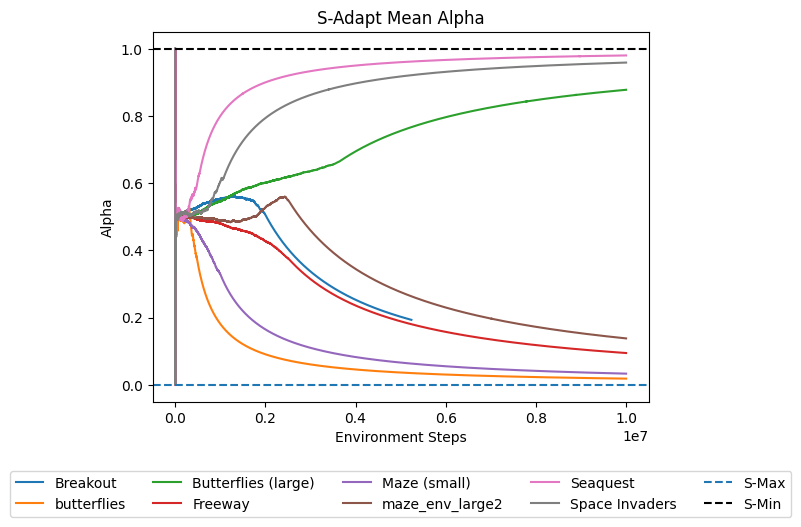

In [58]:

### rolling alphas
data_path = os.listdir("/home/roger/Desktop/surprise-adaptive-agents/paper_runs/rolling_alphas")
for run in sorted(data_path):
    file=os.path.join("/home/roger/Desktop/surprise-adaptive-agents/paper_runs/rolling_alphas", run)
    data = pd.read_csv(file)
    #alphas is the last column
    alpha = data.iloc[:,-1]
    
    # run_name
    run_name = run
    run_name = run_name.replace(".csv", "")
    if run_name == "maze_env2": run_name = "Maze (small)"
    elif run_name == "maze_large_env2": run_name = "Maze (large)"
    elif run_name == "butterfliesEnv": run_name = "Butterflies (small)"
    elif run_name == "butterflies_large2": run_name = "Butterflies (large)"
    elif run_name == "tetris": run_name = "Tetris"
    elif run_name == "breakout": run_name = "Breakout"
    elif run_name == "seaquest": run_name = "Seaquest"
    elif run_name == "space_invaders": run_name = "Space Invaders"
    elif run_name == "freeway": run_name = "Freeway"
    
    x_axis = np.linspace(0, 10_000_000, len(alpha))
    plt.title("S-Adapt Mean Alpha")
    plt.xlabel("Environment Steps")
    plt.ylabel("Alpha")
    plt.plot(x_axis, alpha, label=run_name)
    
# tetris
#data = pd.read_csv("/home/roger/Desktop/surprise-adaptive-agents/runs/dqn_tetris_sadapt-bandit_buffer:bernoulli_withExtrinsic:False_softreset:0_reweard_normalization:1_exp_rew:0_death_cost:0_survival_rew:0_seed:1/log.csv")
#alpha = data.iloc[:,-1]

#run_name = "Tetris"
#x_axis = np.linspace(0, 10_000_000, len(alpha))
#plt.plot(x_axis, alpha, label=run_name)

# add smax label in in y=0 and smin label in y=1
plt.axhline(y=0, linestyle="--", label="S-Max")
plt.axhline(y=1, color="black", linestyle="--", label="S-Min")
# make medium size
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), ncol=5)
        